# Esercizio 2 - Housing

## 1. Dimensioni: verifica quante osservazioni (righe) e quante caratteristiche (colonne) compongono il dataset

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


# Configurazione dello stile dei grafici
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Librerie importate con successo!")

# Caricamento del dataset
dataset_path = Path('../dataset/housing.csv')
df = pd.read_csv(dataset_path)

print(f"Dimensioni del dataset: {df.shape}")
print(f"\nColonne: {list(df.columns)}")

✓ Librerie importate con successo!
Dimensioni del dataset: (2930, 83)

Colonne: ['Unnamed: 0', 'Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage F

## 2. Anteprima: osserva le prime righe dei dati per avere un'idea concreta dei valori contenuti

In [20]:
print("\nPrime righe del dataset:")
df.head(10)


Prime righe del dataset:


,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


## 3. Tipi e valori mancanti: ispeziona il tipo di dato di ogni colonna (numerico, testuale, ecc.) e controlla se ci sono dati mancanti che potrebbero invalidare l'analisi

In [21]:
# Tipi e valori mancanti
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2930 non-null   int64  
 1   Order            2930 non-null   int64  
 2   PID              2930 non-null   int64  
 3   MS SubClass      2930 non-null   int64  
 4   MS Zoning        2930 non-null   object 
 5   Lot Frontage     2440 non-null   float64
 6   Lot Area         2930 non-null   int64  
 7   Street           2930 non-null   object 
 8   Alley            198 non-null    object 
 9   Lot Shape        2930 non-null   object 
 10  Land Contour     2930 non-null   object 
 11  Utilities        2930 non-null   object 
 12  Lot Config       2930 non-null   object 
 13  Land Slope       2930 non-null   object 
 14  Neighborhood     2930 non-null   object 
 15  Condition 1      2930 non-null   object 
 16  Condition 2      2930 non-null   object 
 17  Bldg Type     

Unnamed: 0        0
Order             0
PID               0
MS SubClass       0
MS Zoning         0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 83, dtype: int64

## 4. Statistica descrittiva: genera un prospetto che mostri la media, la deviazione standard e i quartili di tutte le variabili numeriche

In [22]:
# Statistiche descrittive
df.describe()

,Unnamed: 0,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1464.50000,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,0.00000,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,732.25000,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1464.50000,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2196.75000,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2929.00000,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## 5. Target analysis: determina il range di prezzi di vendita (SalePrice) e identifica se ci sono "punti di prezzo" più frequenti di altri.

In [23]:
minimo = df["SalePrice"].min()
massimo = df["SalePrice"].max()
print(f"Range Prezzi: {minimo} – {massimo}")

punteggio = df['SalePrice'].value_counts().sort_values(ascending=False)
print(punteggio)

Range Prezzi: 12789 – 755000
SalePrice
135000    34
140000    33
130000    29
155000    28
145000    26
          ..
97900      1
117250     1
164990     1
163990     1
173900     1
Name: count, Length: 1032, dtype: int64


## 1. Analisi della Variabile Target: rappresenta graficamente come si distribuiscono i prezzi di vendita. Includi una linea che mostri la densità per capire se la distribuzione è simmetrica o sbilanciata.

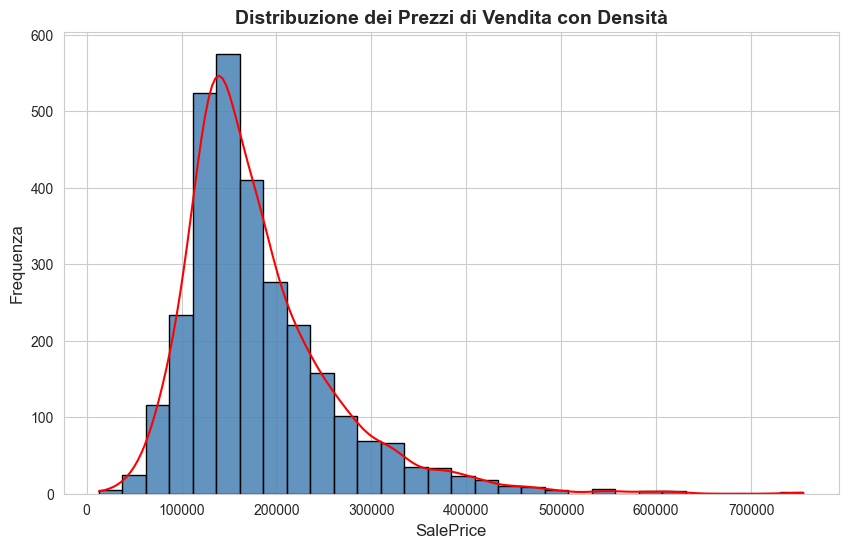

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=30, kde=True, color='steelblue', edgecolor='black', alpha=0.85).lines[0].set_color('red')
plt.xlabel('SalePrice', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.title('Distribuzione dei Prezzi di Vendita con Densità', fontsize=14, fontweight='bold')
plt.show()

## 2. Impatto della Qualità: visualizza il legame tra la qualità complessiva dell'immobile e il suo valore.

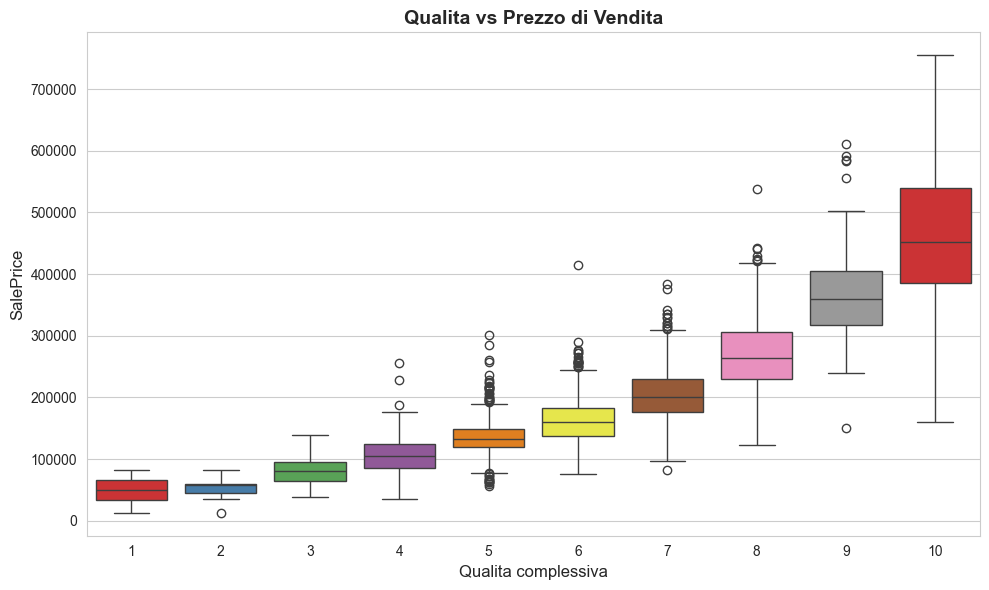

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Overall Qual', y='SalePrice', palette='Set1')
plt.xlabel('Qualita complessiva', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.title('Qualita vs Prezzo di Vendita', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 3. Densità dei Prezzi per Tipologia: analizza la distribuzione del prezzo per ogni categoria di edificio, evidenziando non solo la media ma anche la densità dei dati in modo armonico.

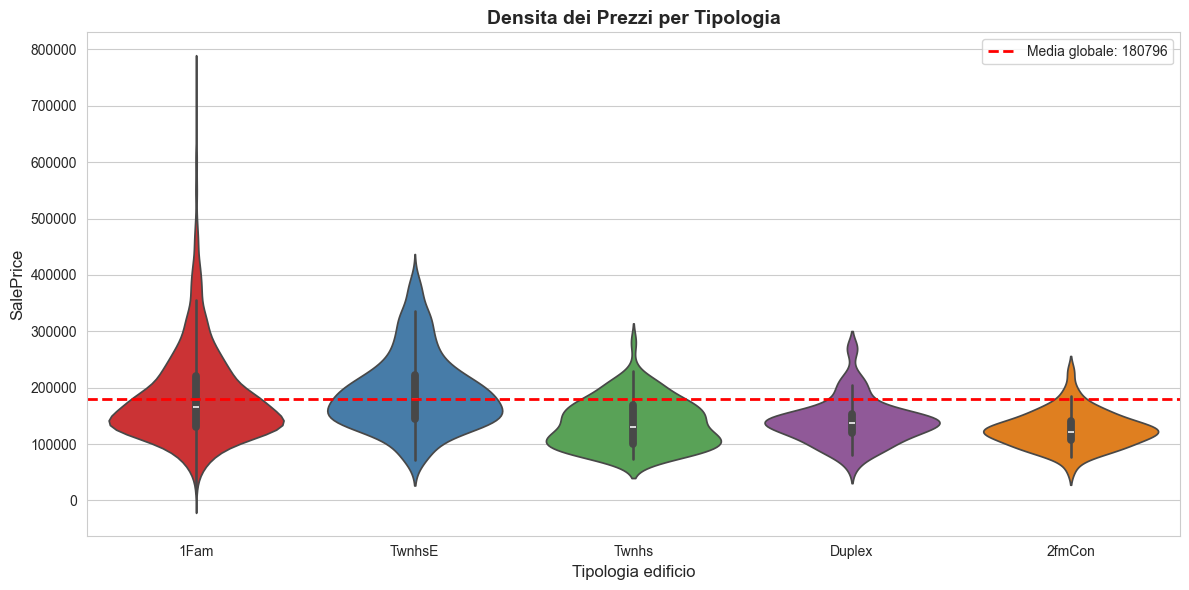

In [26]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Bldg Type', y='SalePrice', palette='Set1', inner='box')
plt.axhline(df['SalePrice'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media globale: {df["SalePrice"].mean():.0f}')
plt.xlabel('Tipologia edificio', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.title('Densita dei Prezzi per Tipologia', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

## 4. Relazione Spazio-Valore: crea un grafico che metta in relazione la superficie abitabile con il prezzo di vendita. Differenzia i punti del grafico in base alla qualità complessiva per vedere come questi due fattori interagiscono.

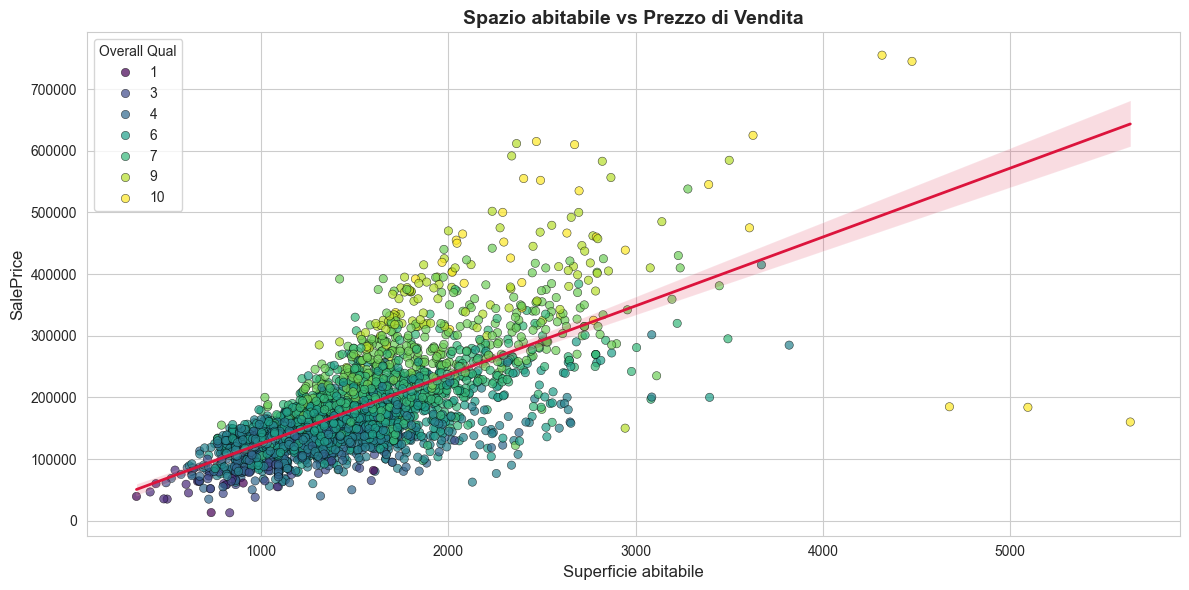

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice', hue='Overall Qual', palette='viridis', alpha=0.7, edgecolor='black', linewidth=0.4)
sns.regplot(data=df, x='Gr Liv Area', y='SalePrice', scatter=False, color='crimson', line_kws={'lw': 2})
plt.xlabel('Superficie abitabile', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.title('Spazio abitabile vs Prezzo di Vendita', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Mappa delle Relazioni: calcola il legame tra tutte le variabili numeriche del dataset e rappresentalo con una mappa di calore colorata, mostrando i coefficienti di correlazione per individuare i 3 fattori che influenzano maggiormente il prezzo.

Matrice di Correlazione:
                 Unnamed: 0     Order       PID  MS SubClass  Lot Frontage  \
Unnamed: 0         1.000000  1.000000  0.173593     0.011797     -0.007034   
Order              1.000000  1.000000  0.173593     0.011797     -0.007034   
PID                0.173593  0.173593  1.000000    -0.001281     -0.096918   
MS SubClass        0.011797  0.011797 -0.001281     1.000000     -0.420135   
Lot Frontage      -0.007034 -0.007034 -0.096918    -0.420135      1.000000   
Lot Area           0.031354  0.031354  0.034868    -0.204613      0.491313   
Overall Qual      -0.048500 -0.048500 -0.263147     0.039419      0.212042   
Overall Cond      -0.011054 -0.011054  0.104451    -0.067349     -0.074448   
Year Built        -0.052319 -0.052319 -0.343388     0.036579      0.121562   
Year Remod/Add    -0.075566 -0.075566 -0.157111     0.043397      0.091712   
Mas Vnr Area      -0.030907 -0.030907 -0.229283     0.002730      0.222407   
BsmtFin SF 1      -0.032321 -0.032321 -

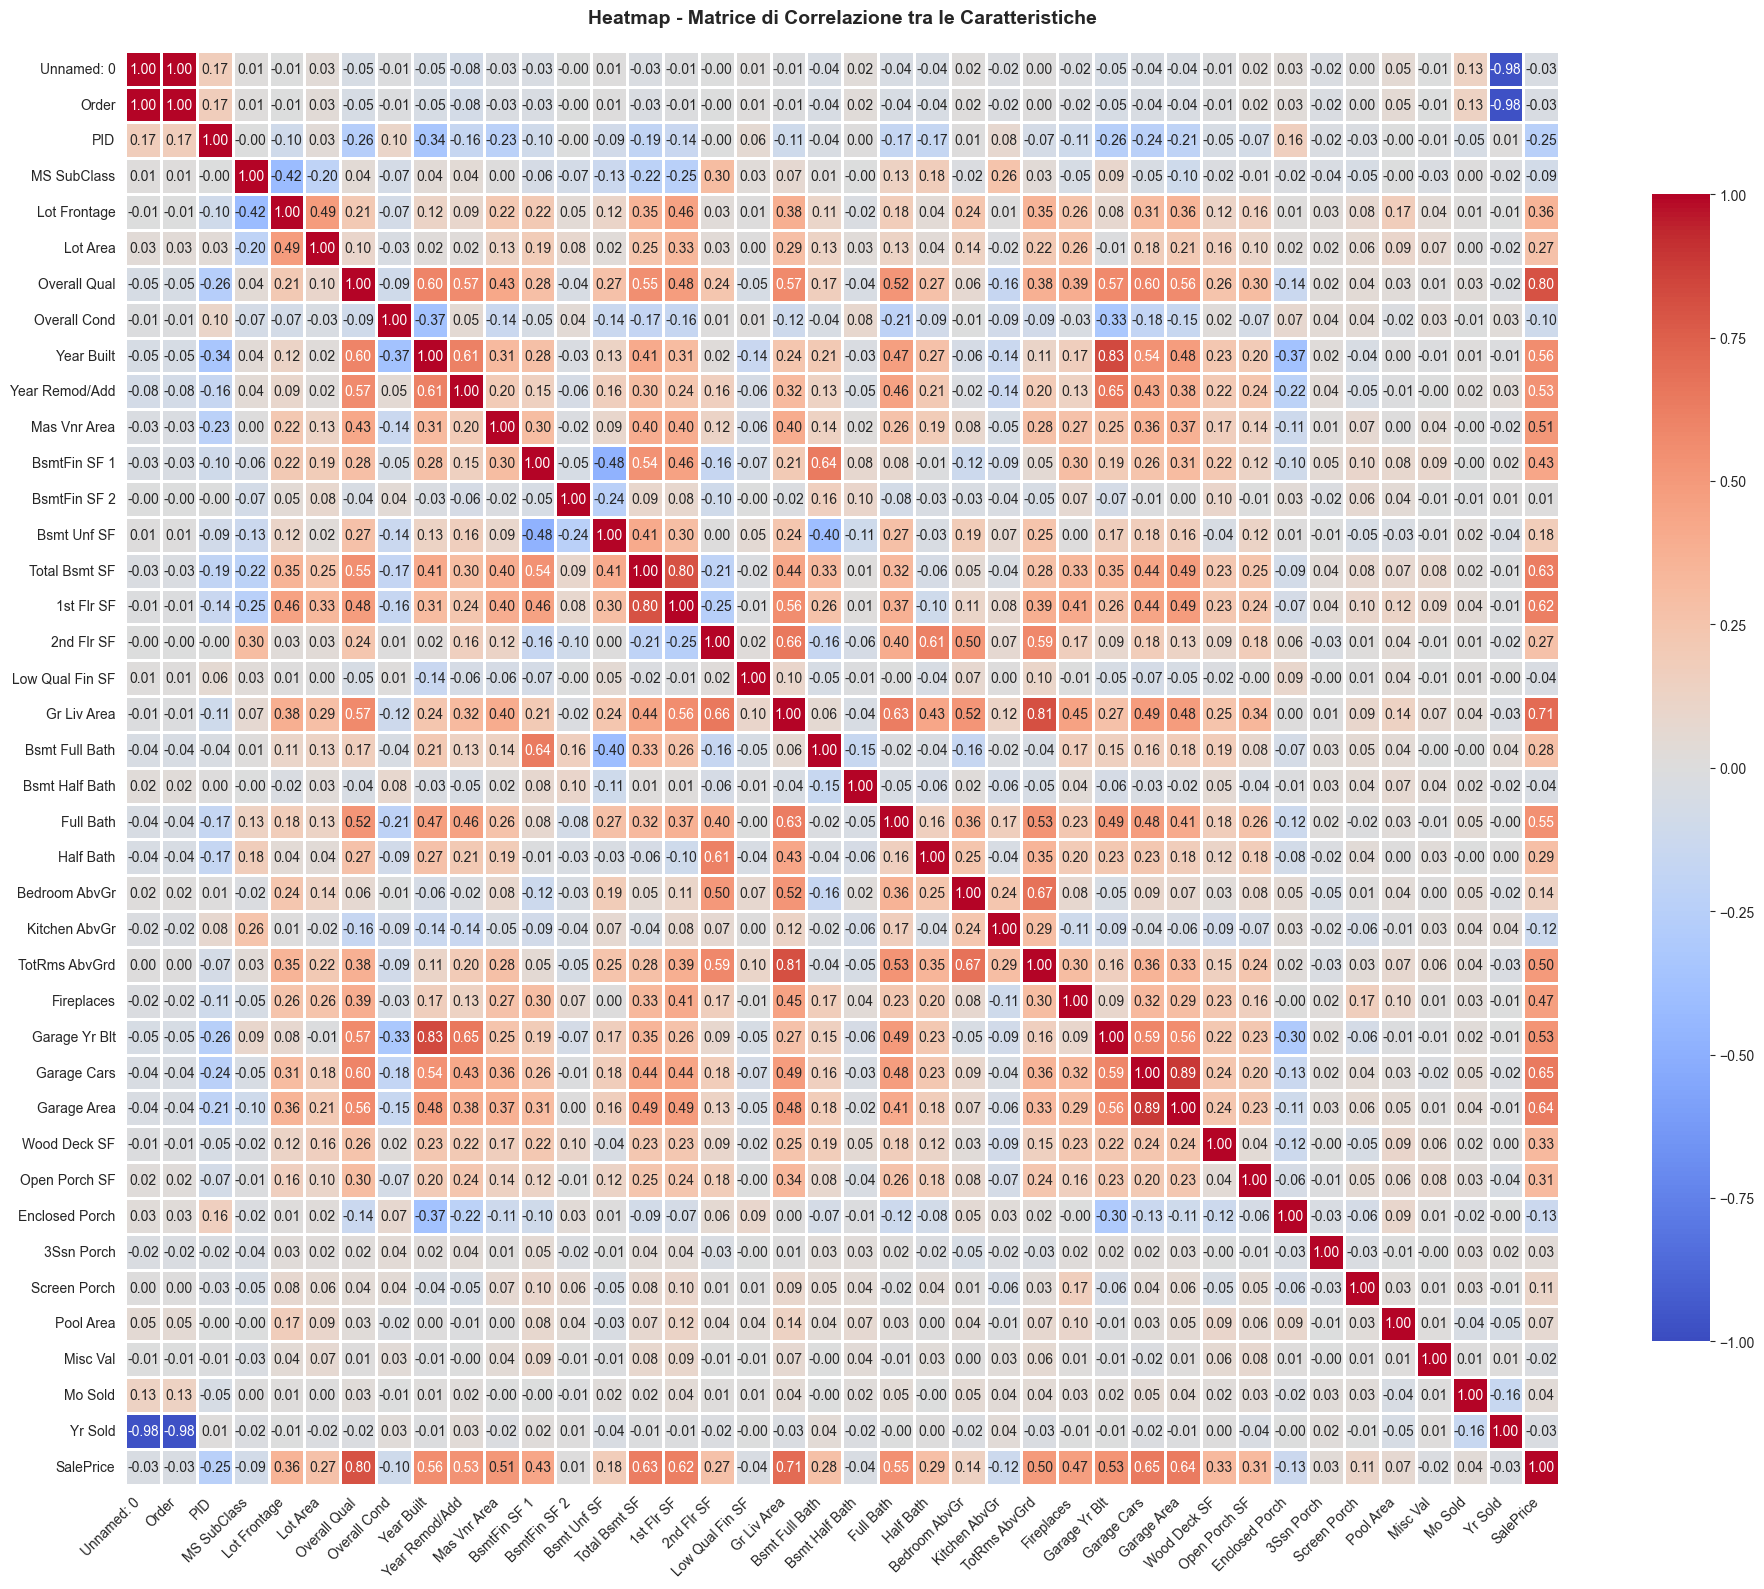


Top 3 fattori correlati a SalePrice:
BsmtFin SF 2    0.005891
Misc Val        0.015691
Yr Sold         0.030569
Name: SalePrice, dtype: float64


In [28]:
# Seleziona solo le colonne numeriche
numeri= df.select_dtypes(include='number').columns
features = numeri.tolist()

# Calcola la matrice di correlazione
correlation_matrix = df[features].corr()

print("Matrice di Correlazione:")
print(correlation_matrix)

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, center=0)
plt.title('Heatmap - Matrice di Correlazione tra le Caratteristiche', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Top 3 fattori correlati a SalePrice
top3 = correlation_matrix['SalePrice'].drop(labels=['SalePrice']).abs().sort_values()
print("\nTop 3 fattori correlati a SalePrice:")
print(top3.head(3))

# PREPROCESSING

# GESTIONE DEI VALORI NULLI 

In [29]:
# Controllo dei valori mancanti 
print("Valori mancanti per colonna:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# nel dataset i valori nulli sono valori lasciati vuori
print("\nControllo dei valori '' per colonna:")
for col in df.columns:
    if df[col].dtype == 'object':
        count = (df[col] == '').sum()
        if count > 0:
            print(f"{col}: {count} ({(count/len(df))*100:.2f}%)")


df.replace('', np.nan, inplace=True)


Valori mancanti per colonna:
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

Controllo dei valori '' per colonna:


In [30]:
# Imposta una soglia di valori mancanti (40%)
percentuale_scarto = 40.0
percentuale_nulli = (df.isnull().sum() / len(df)) * 100

# Identifica le colonne da eliminare
columns_to_drop = percentuale_nulli[percentuale_nulli > percentuale_scarto].index.tolist()

print(f"Colonne con più del 40% di valori mancanti:")
print(columns_to_drop)

# Elimina le colonne
df = df.drop(columns=columns_to_drop)

print(f"\nColonne eliminate: {columns_to_drop}")
print(f"Nuove dimensioni del dataset: {df.shape}")

Colonne con più del 40% di valori mancanti:
['Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']

Colonne eliminate: ['Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']
Nuove dimensioni del dataset: (2930, 77)


# Separa le feature in numeriche e categoriche:
## a. Numeriche: riempi i valori mancanti con la mediana.
## b. Categoriche: riempi i valori mancanti con la moda.# 

In [31]:
# Gestione dei valori mancanti
# Per le colonne categoriche, sostituiamo con la moda
# Per le colonne numeriche, sostituiamo con la mediana
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            # Sostituiamo con la moda per le categoriche
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)
            print(f"Colonna '{col}': sostituiti {df[col].isnull().sum()} valori mancanti con '{mode_value}' (moda)")
        else:
            # Sostituiamo con la mediana per le numeriche
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)
            print(f"Colonna '{col}': sostituiti valori mancanti con {median_value} (mediana)")

print("\nVerifica finale dei valori mancanti:")
print(df.isnull().sum().sum())

Colonna 'Lot Frontage': sostituiti valori mancanti con 68.0 (mediana)
Colonna 'Mas Vnr Area': sostituiti valori mancanti con 0.0 (mediana)
Colonna 'Bsmt Qual': sostituiti 0 valori mancanti con 'TA' (moda)
Colonna 'Bsmt Cond': sostituiti 0 valori mancanti con 'TA' (moda)
Colonna 'Bsmt Exposure': sostituiti 0 valori mancanti con 'No' (moda)
Colonna 'BsmtFin Type 1': sostituiti 0 valori mancanti con 'GLQ' (moda)
Colonna 'BsmtFin SF 1': sostituiti valori mancanti con 370.0 (mediana)
Colonna 'BsmtFin Type 2': sostituiti 0 valori mancanti con 'Unf' (moda)
Colonna 'BsmtFin SF 2': sostituiti valori mancanti con 0.0 (mediana)
Colonna 'Bsmt Unf SF': sostituiti valori mancanti con 466.0 (mediana)
Colonna 'Total Bsmt SF': sostituiti valori mancanti con 990.0 (mediana)
Colonna 'Electrical': sostituiti 0 valori mancanti con 'SBrkr' (moda)
Colonna 'Bsmt Full Bath': sostituiti valori mancanti con 0.0 (mediana)
Colonna 'Bsmt Half Bath': sostituiti valori mancanti con 0.0 (mediana)
Colonna 'Garage Type'

# ENCODIG DELLE VARIABILI CATEGORICHE UTILIZZANDO IL ONE-HOT ENCODING

In [32]:
# Identificazione delle colonne numeriche e categoriche
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Rimuoviamo la variabile target dalla lista delle categoriche
if 'SalePrice' in categorical_cols:
    categorical_cols.remove('SalePrice')

print(f"Colonne numeriche ({len(numerical_cols)}): {numerical_cols}")
print(f"\nColonne categoriche ({len(categorical_cols)}): {categorical_cols}")


Colonne numeriche (40): ['Unnamed: 0', 'Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']

Colonne categoriche (37): ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heati

In [33]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# SPLIT E NORMALIZZAZIONE

In [34]:
# Separazione delle feature e del target
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

print(f"Shape delle feature (X): {X.shape}")
print(f"Shape del target (y): {y.shape}")
print(f"\nDistribuzione del target:")
print(y.value_counts())

# Split train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    #stratify=y  # Manteniamo la stessa proporzione delle classi
)

print(f"Dimensioni del training set: {X_train.shape}")
print(f"Dimensioni del test set: {X_test.shape}")
print(f"\nDistribuzione delle classi nel training set:")
print(y_train.value_counts())
print(f"\nDistribuzione delle classi nel test set:")
print(y_test.value_counts())

Shape delle feature (X): (2930, 245)
Shape del target (y): (2930,)

Distribuzione del target:
SalePrice
135000    34
140000    33
130000    29
155000    28
145000    26
          ..
97900      1
117250     1
164990     1
163990     1
173900     1
Name: count, Length: 1032, dtype: int64
Dimensioni del training set: (2344, 245)
Dimensioni del test set: (586, 245)

Distribuzione delle classi nel training set:
SalePrice
140000    28
145000    25
135000    25
130000    24
155000    24
          ..
101000     1
143250     1
182900     1
426000     1
94900      1
Name: count, Length: 887, dtype: int64

Distribuzione delle classi nel test set:
SalePrice
135000    9
126000    7
141000    6
250000    5
130000    5
         ..
160500    1
175000    1
315750    1
441929    1
184000    1
Name: count, Length: 372, dtype: int64


## Normalizzazione

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)